In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

## Printing Number Of Records in the Dataset

In [15]:
data = pd.read_csv("downloaded.csv")
#Prints the number of Records
print(len(data))

462


## Printing MetaData Of The Dataset

In [3]:
#Prints Dataset Information
data.info()

#Prints column names in Dataset
print(data.columns)

#Prints Dataset Description
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB
Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')
        row.names         sbp     tobacco         ldl   adiposity       typea  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean  

## Features Of The Dataset

In [ ]:
1. The Dataset consists of 11 columns.
2. chd is a binary attribute
3. famhist is a nominal attribute with two states - Present and Absent
4. Typea, Obesity, Alcohol, Age, Adiposity, ldl, Tobacco, sbp are Numeric Attributes.
5. Dataset has total 11 Attributes.

## Draw a bar plot to show the number of persons having CHD or not in comparison to they having family history of the disease or not

Text(0, 0.5, 'Number Of Persons')

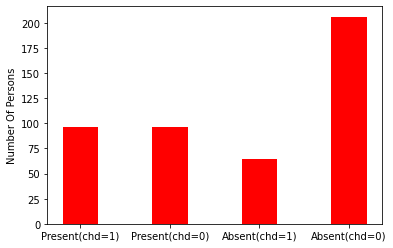

In [43]:
col1 = len(data[(data['famhist'] == 'Present') & (data['chd'] == 1)])
col2 = len(data[(data['famhist'] == 'Present') & (data['chd'] == 0)])
col3 = len(data[(data['famhist'] == 'Absent') & (data['chd'] == 1)])
col4 = len(data[(data['famhist'] == 'Absent') & (data['chd'] == 0)])
plt.bar(['Present(chd=1)', 'Present(chd=0)', 'Absent(chd=1)', 'Absent(chd=0)'], [col1, col2, col3, col4] , color ='red',
        width = 0.4)
plt.ylabel("Number Of Persons")

## Does age have any correlation with sbp? Choose appropriate plot to show the relationship

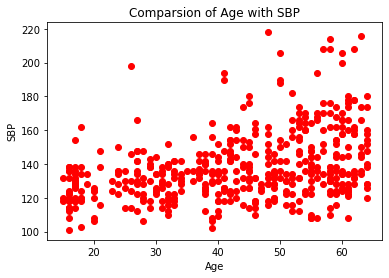

In [30]:
x = data['age']
y = data['sbp']
plt.scatter(x, y, color = "red")
plt.xlabel("Age")
plt.ylabel("SBP")
plt.title("Comparsion of Age with SBP")
plt.show()

## Compare the distribution of tobacco consumption for persons having CHD and not having CHD. Can you interpret the effect of tobacco consumption on having coronary heart disease

<AxesSubplot:xlabel='chd', ylabel='tobacco'>

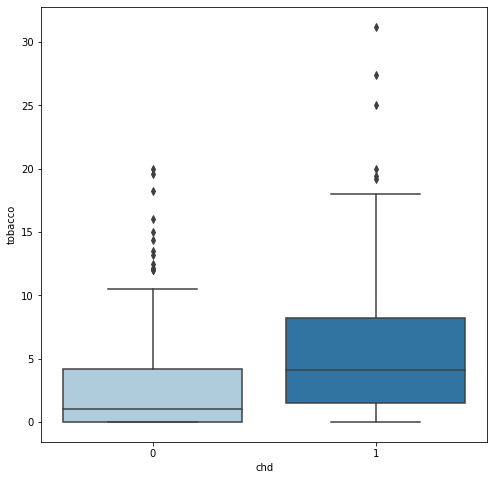

In [30]:
datanew = pd.read_csv("downloaded.csv")
plt.figure(figsize = (8,8))
sb.boxplot(x = 'chd', y = 'tobacco', data = datanew, palette = 'Paired')

## How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the relationships

array([[<AxesSubplot:xlabel='sbp', ylabel='sbp'>,
        <AxesSubplot:xlabel='ldl', ylabel='sbp'>,
        <AxesSubplot:xlabel='obesity', ylabel='sbp'>,
        <AxesSubplot:xlabel='age', ylabel='sbp'>],
       [<AxesSubplot:xlabel='sbp', ylabel='ldl'>,
        <AxesSubplot:xlabel='ldl', ylabel='ldl'>,
        <AxesSubplot:xlabel='obesity', ylabel='ldl'>,
        <AxesSubplot:xlabel='age', ylabel='ldl'>],
       [<AxesSubplot:xlabel='sbp', ylabel='obesity'>,
        <AxesSubplot:xlabel='ldl', ylabel='obesity'>,
        <AxesSubplot:xlabel='obesity', ylabel='obesity'>,
        <AxesSubplot:xlabel='age', ylabel='obesity'>],
       [<AxesSubplot:xlabel='sbp', ylabel='age'>,
        <AxesSubplot:xlabel='ldl', ylabel='age'>,
        <AxesSubplot:xlabel='obesity', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>]], dtype=object)

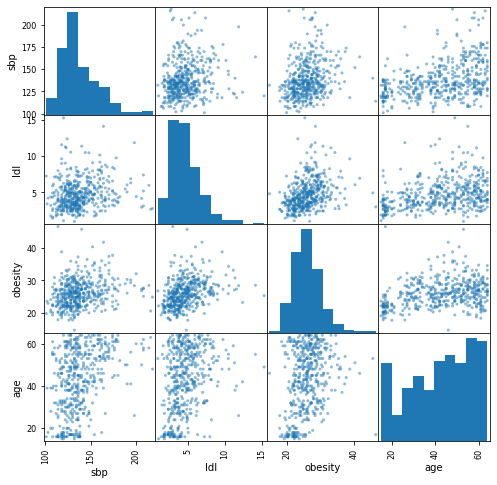

In [21]:
datanew.drop(['row.names', 'tobacco', 'adiposity', 'famhist', 'typea', 'alcohol', 'chd'], axis = 1, inplace = True)
pd.plotting.scatter_matrix(datanew, figsize = (8,8))

## Derive a new column called age group from age column where persons falling in different age ranges are categorized as below: 
1.	(0–15): young
2.	(15–35): adults
3.	(35–55): mid
4.	(55–): old


In [34]:
bins = [0, 15, 35, 55, 105]
labels = ['Young', 'Adults', 'Mid', 'Old']
data['age_group'] = pd.cut(data['age'], bins, labels = labels)
data

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,age_group
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,Mid
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,Old
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,Mid
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,Old
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,Mid
...,...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0,Old
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1,Mid
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0,Mid
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0,Mid


## Find out the number of CHD cases in different age categories (young, adults, mid, old). Do a barplot and sort them in the order of age groups.

<BarContainer object of 4 artists>

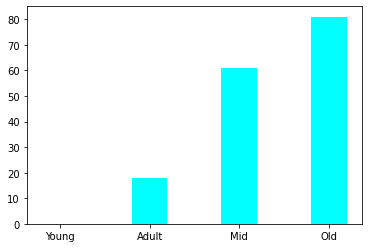

In [5]:
col1 = len(data[(data['age_group'] == 'Young') & (data['chd'] == 1)])
col2 = len(data[(data['age_group'] == 'Adults') & (data['chd'] == 1)])
col3 = len(data[(data['age_group'] == 'Mid') & (data['chd'] == 1)])
col4 = len(data[(data['age_group'] == 'Old') & (data['chd'] == 1)])
plt.bar(['Young', 'Adult', 'Mid', 'Old'], sorted([col1, col2, col3, col4]) , color ='cyan',
        width = 0.4)

## Draw a box plot to compare distributions of ldl for different age groups.

<AxesSubplot:xlabel='age_group', ylabel='ldl'>

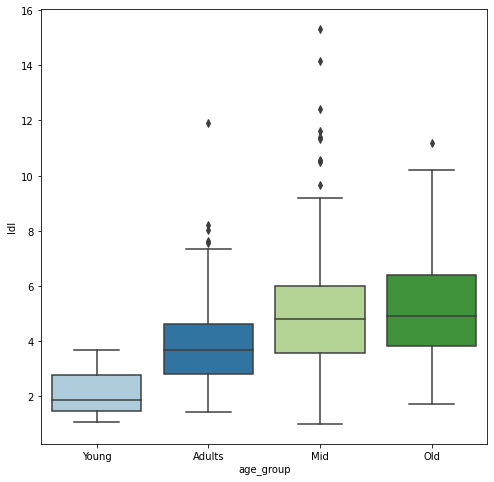

In [35]:
plt.figure(figsize = (8,8))
data
sb.boxplot(x = 'age_group', y = 'ldl', data = data, palette = 'Paired')